##Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the Dataset

In [ ]:
from sklearn.utils import shuffle
df = pd.read_csv("iris.data", header = None)
df.columns = ['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)', 'petal_width(cm)', 'class']
df_shuffled = shuffle(df, random_state=42)
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor


##Encoding the Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_shuffled["class"] = le.fit_transform(df_shuffled["class"])

##Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X = df_shuffled.iloc[:, :-1].values
y = df_shuffled.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##Training the Naive Bayes model on the Training set

###GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

###MultinomialNB

In [ ]:
mnb = MultinomialNB(alpha = 0.4, force_alpha=False, fit_prior=False, class_prior=None)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.4, fit_prior=False, force_alpha=False)

###BernoulliNB

In [ ]:
bnb = BernoulliNB(alpha = 0.4, force_alpha=True, binarize=1.0, fit_prior=False, class_prior=None)
bnb.fit(X_train, y_train)

BernoulliNB(alpha=0.4, binarize=1.0, fit_prior=False)

##GuassianNB- Accuracy, Precision, Recall, F-score, confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_g = gnb.predict(X_test)

acc = accuracy_score(y_test, y_pred_g)

prec = precision_score(y_test, y_pred_g, average='macro')

rec = recall_score(y_test, y_pred_g, average='macro')

f1 = f1_score(y_test, y_pred_g, average='macro')

cm = confusion_matrix(y_test, y_pred_g)

print(f"Accuracy      : {acc:.2f}")
print(f"Precision     : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1 Score      : {f1:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy      : 0.98
Precision     : 0.98
Recall        : 0.98
F1 Score      : 0.98
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


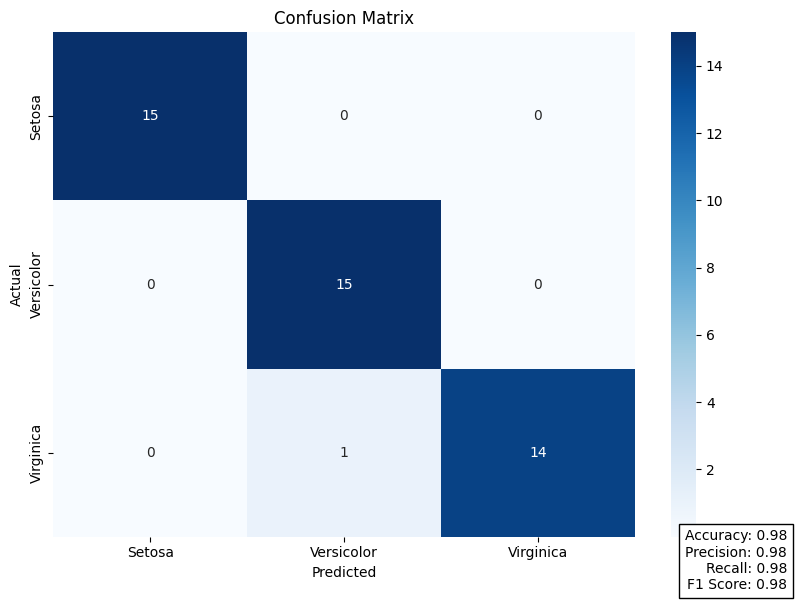

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc:.2f}\nPrecision: {prec:.2f}\nRecall: {rec:.2f}\nF1 Score: {f1:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

##MultinomialNB- Accuracy, Precision, Recall, F-score, confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_m = mnb.predict(X_test)

acc = accuracy_score(y_test, y_pred_m)

prec = precision_score(y_test, y_pred_m, average='macro')

rec = recall_score(y_test, y_pred_m, average='macro')

f1 = f1_score(y_test, y_pred_m, average='macro')

cm = confusion_matrix(y_test, y_pred_m)

print(f"Accuracy      : {acc:.2f}")
print(f"Precision     : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1 Score      : {f1:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy      : 0.98
Precision     : 0.98
Recall        : 0.98
F1 Score      : 0.98
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


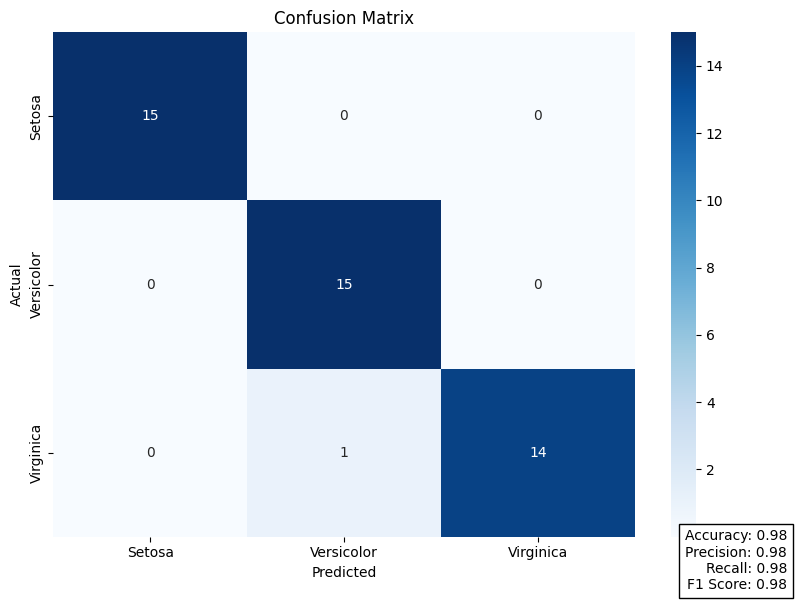

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc:.2f}\nPrecision: {prec:.2f}\nRecall: {rec:.2f}\nF1 Score: {f1:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()

##BernoulliNB- Accuracy, Precision, Recall, F-score, confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_b = bnb.predict(X_test)

acc = accuracy_score(y_test, y_pred_b)

prec = precision_score(y_test, y_pred_b, average='macro')

rec = recall_score(y_test, y_pred_b, average='macro')

f1 = f1_score(y_test, y_pred_b, average='macro')

cm = confusion_matrix(y_test, y_pred_b)

print(f"Accuracy      : {acc:.2f}")
print(f"Precision     : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1 Score      : {f1:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy      : 0.67
Precision     : 0.46
Recall        : 0.67
F1 Score      : 0.54
Confusion Matrix:
 [[15  0  0]
 [ 3  0 12]
 [ 0  0 15]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


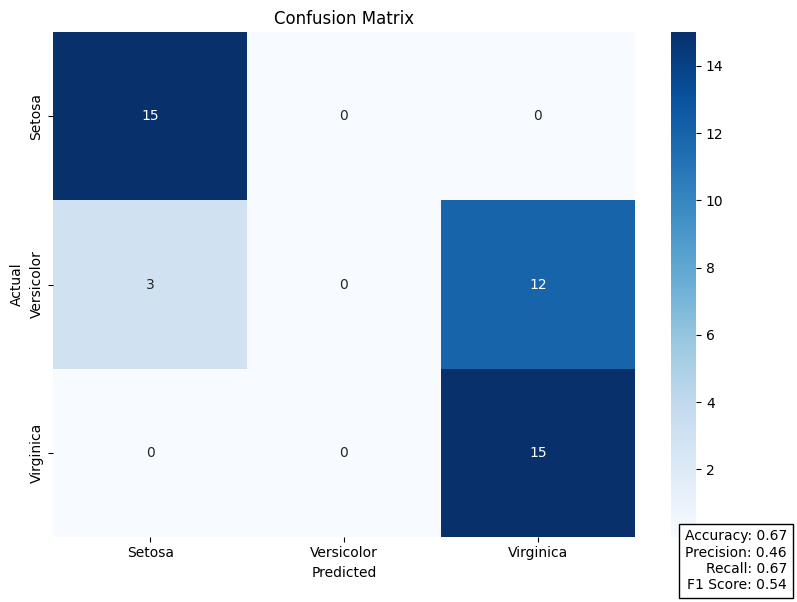

In [ ]:
# Plot with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Add metrics text below the plot
plt.figtext(0.99, 0.01, f'Accuracy: {acc:.2f}\nPrecision: {prec:.2f}\nRecall: {rec:.2f}\nF1 Score: {f1:.2f}',
            horizontalalignment='right', fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()